In [81]:
#Important imports for running code
import numpy as np
import scipy.optimize as sp
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

In [82]:
Calibrations =['Data_Air_to_Glass_Labday_3.txt','Data_Glass_to_Air_Labday_3.txt']

Air_to_Glass = np.loadtxt(Calibrations[0])
Glass_to_Air = np.loadtxt(Calibrations[1])

theta1_atg = Air_to_Glass[:, 0]
thetam_atg = Air_to_Glass[:, 1]

theta1_gta = Glass_to_Air[:, 0]
thetam_gta = Glass_to_Air[:, 1]

# Convert into radians
theta1_atg = theta1_atg * np.pi/180
theta1_gta = theta1_gta * np.pi/180
thetam_atg = thetam_atg * np.pi/180
thetam_gta = np.unwrap(thetam_gta,period=np.pi) * np.pi/180

theta1 = np.array([theta1_atg, theta1_gta])
thetam = np.array([thetam_atg, thetam_gta])

theta2_list = [theta1_atg - thetam_atg, theta1_gta + thetam_gta]

In [83]:
theta1_atg_err = np.full_like(np.sin(theta1[0]), abs(np.sin(0.5 * np.pi/180)))
theta2_atg_err = np.full_like(np.sin(theta2_list[0]), abs(np.sin(0.5 * np.pi/180)))
theta1_gta_err = np.full_like(np.sin(theta1[1]), abs(np.sin(0.5 * np.pi/180)))
theta2_gta_err = np.full_like(np.sin(theta2_list[1]), abs(np.sin(0.5 * np.pi/180)))

In [84]:
#Fit for the code
def n_fit(theta1, n):
    return theta1 / n

n_guess = 2

AIR TO GLASS LAB DAY 3

The index of refraction for the glass is 1.4542 plusminus 0.0134


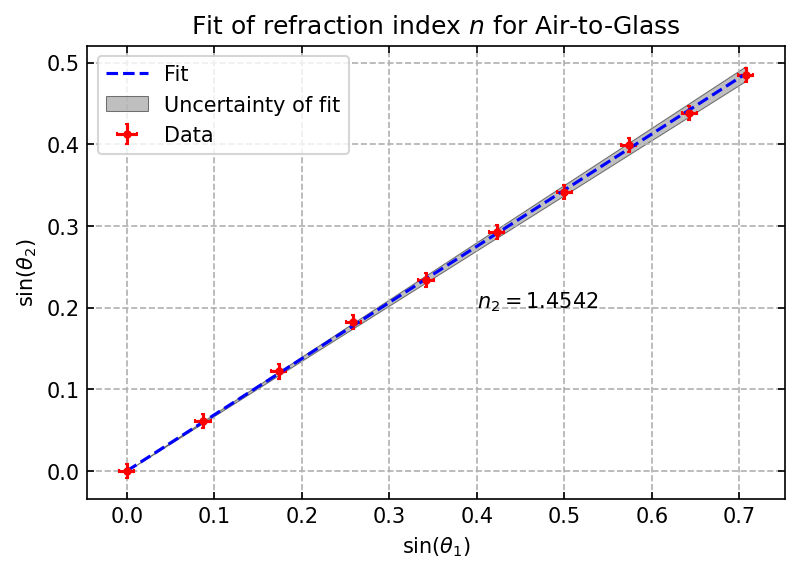

In [85]:
p_opt_atg, p_cov_atg = sp.curve_fit(n_fit, np.sin(theta1[0]), np.sin(theta2_list[0]), sigma = theta1_atg_err, absolute_sigma = True, p0 = n_guess)

fig, ax = plt.subplots()
# ax.plot(np.sin(theta1), np.sin(theta2), 'o', label='Data', color = 'tab:red')  # Plotting theta1 vs theta2
ax.errorbar(np.sin(theta1[0]), np.sin(theta2_list[0]), xerr = theta1_atg_err, yerr = theta2_atg_err, fmt = 'o', capsize=1, color='red', markersize=3, label='Data')
ax.plot(np.sin(theta1[0]), n_fit(np.sin(theta1[0]), p_opt_atg[0]), '--', color= 'blue', label='Fit')  # Plotting the fit curve

ax.fill_between(np.sin(theta1[0]), n_fit(np.sin(theta1[0]), p_opt_atg[0] - 2 * np.sqrt(p_cov_atg[0][0])), n_fit(np.sin(theta1[0]), p_opt_atg[0] + 2 * np.sqrt(p_cov_atg[0][0])), 
                color = 'grey', alpha = 0.5, edgecolor = 'k', linewidth = 0.5, label = 'Uncertainty of fit')

ax.set_xlabel(r'$\sin(\theta_1)$')
ax.set_ylabel(r'$\sin(\theta_2)$')
ax.grid(ls = '--')
ax.set_title(r'Fit of refraction index $n$ for Air-to-Glass')
ax.legend()
ax.tick_params(direction = 'in', top = True, right = True)
ax.text(0.4, 0.2, f'$n_2 = {round(p_opt_atg[0], 4)}$')

print('The index of refraction for the glass is %s plusminus %s' % (round(p_opt_atg[0], 4), round(np.sqrt(p_cov_atg[0][0]), 4)))
n_2_atg = p_opt_atg
plt.show()

GLASS TO AIR LAB DAY 3

The index of refraction for the glass is 0.9785 plusminus 0.0061


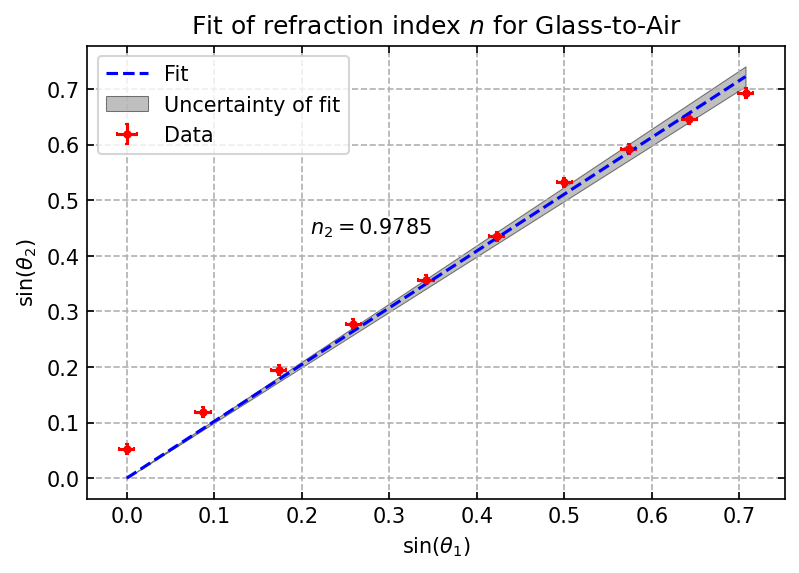

In [86]:
p_opt_gta, p_cov_gta = sp.curve_fit(n_fit, np.sin(theta1[1]), np.sin(theta2_list[1]), sigma = theta1_gta_err, absolute_sigma = True, p0 = n_guess)

fig, ax = plt.subplots()
# ax.plot(np.sin(theta1), np.sin(theta2), 'o', label='Data', color = 'tab:red')  # Plotting theta1 vs theta2
ax.errorbar(np.sin(theta1[1]), np.sin(theta2_list[1]), xerr = theta1_gta_err, yerr = theta2_gta_err, fmt = 'o', capsize=1, color='red', markersize=3, label='Data')
ax.plot(np.sin(theta1[1]), n_fit(np.sin(theta1[1]), p_opt_gta[0]), '--', color= 'blue', label='Fit')  # Plotting the fit curve

ax.fill_between(np.sin(theta1[1]), n_fit(np.sin(theta1[1]), p_opt_gta[0] - 4*np.sqrt(p_cov_gta[0][0])), n_fit(np.sin(theta1[1]), p_opt_gta[0] + 4* np.sqrt(p_cov_gta[0][0])), 
                color = 'grey', alpha = 0.5, edgecolor = 'k', linewidth = 0.5, label = 'Uncertainty of fit')

ax.set_xlabel(r'$\sin(\theta_1)$')
ax.set_ylabel(r'$\sin(\theta_2)$')
ax.grid(ls = '--')
ax.set_title(r'Fit of refraction index $n$ for Glass-to-Air')
ax.legend()
ax.tick_params(direction = 'in', top = True, right = True)
ax.text(0.21, 0.44, f'$n_2 = {round(p_opt_gta[0], 4)}$')

print('The index of refraction for the glass is %s plusminus %s' % (round(p_opt_gta[0], 4), round(np.sqrt(p_cov_gta[0][0]), 4)))
n_2_gta = p_opt_gta
plt.show()




COMPARING R+T01

In [87]:
#Get data
S_pol_L3 = np.loadtxt('S_pol_AtG_Labday_3.txt')
P_pol_L3 = np.loadtxt('P_pol_AtG_Labday_3.txt')

#Intensity of laser
E_0_S = 5 #1.8 on the day
E_0_P = 1.25

#Intensity of transmitted and reflected light
E_1_S = S_pol_L3[:, 5]+0.1
E_2_S = S_pol_L3[:, 2]+0.1

E_1_P = P_pol_L3[:, 5]+0.1
E_2_P = P_pol_L3[:, 2]+0.1

In [88]:
#Getting the small r value
r_s = E_1_S/E_0_S

r_p =E_1_P/E_0_P
r_p, r_s

(array([0.08  , 0.08  , 0.088 , 0.0896, 0.0864, 0.084 , 0.084 , 0.0808,
        0.08  , 0.072 , 0.064 , 0.056 , 0.0608, 0.068 , 0.088 , 0.116 ,
        0.168 , 0.264 ]),
 array([0.02 , 0.02 , 0.044, 0.058, 0.051, 0.05 , 0.066, 0.054, 0.074,
        0.076, 0.114, 0.13 , 0.174, 0.24 , 0.28 , 0.42 , 0.6  , 0.74 ]))

In [89]:
#Getting the small t value
t_s = E_2_S/E_0_S

t_p = E_2_P/E_0_P
t_p, t_s

(array([0.424, 0.44 , 0.464, 0.448, 0.432, 0.4  , 0.4  , 0.392, 0.368,
        0.352, 0.32 , 0.312, 0.264, 0.232, 0.192, 0.16 , 0.116, 0.08 ]),
 array([0.78 , 0.84 , 0.86 , 0.82 , 0.78 , 0.74 , 0.68 , 0.68 , 0.64 ,
        0.6  , 0.5  , 0.5  , 0.38 , 0.3  , 0.234, 0.164, 0.081, 0.028]))

In [90]:
#Large R value:
R_s = r_s**2

R_p= r_p**2
R_p, R_s

(array([0.0064    , 0.0064    , 0.007744  , 0.00802816, 0.00746496,
        0.007056  , 0.007056  , 0.00652864, 0.0064    , 0.005184  ,
        0.004096  , 0.003136  , 0.00369664, 0.004624  , 0.007744  ,
        0.013456  , 0.028224  , 0.069696  ]),
 array([4.0000e-04, 4.0000e-04, 1.9360e-03, 3.3640e-03, 2.6010e-03,
        2.5000e-03, 4.3560e-03, 2.9160e-03, 5.4760e-03, 5.7760e-03,
        1.2996e-02, 1.6900e-02, 3.0276e-02, 5.7600e-02, 7.8400e-02,
        1.7640e-01, 3.6000e-01, 5.4760e-01]))

In [91]:
#Import the angles measured:
theta1_s = S_pol_L3[:, 0]
thetam_reflect_s = 360 - S_pol_L3[:, 4]
thetam_trans_s = S_pol_L3[:, 1]

theta1_p = P_pol_L3[:, 0]
thetam_reflect_p = 360 - P_pol_L3[:, 4]
thetam_trans_p = P_pol_L3[:, 1]

#convert to radians:
theta1_s = theta1_s * np.pi/180
#thetam_reflect_s = thetam_reflect_s * np.pi/180
thetam_trans_s = thetam_trans_s * np.pi/180
thetam_reflect_s = np.unwrap(thetam_reflect_s,period=np.pi) * np.pi/180
#thetam_trans_s = np.unwrap(thetam_trans_s, period=np.pi) *np.pi/180

theta1_p = theta1_p * np.pi/180
#thetam_reflect_p = thetam_reflect_p * np.pi/180
thetam_trans_p = thetam_trans_p *np.pi/180
thetam_reflect_p = np.unwrap(thetam_reflect_p,period=np.pi) * np.pi/180
#thetam_trans_p = np.unwrap(thetam_trans_p, period=np.pi) *np.pi/180

# Calculate real angle
theta2_reflect_s = theta1_s - thetam_reflect_s
theta2_trans_s = theta1_s - thetam_trans_s

theta2_reflect_p = theta1_p - thetam_reflect_p
theta2_trans_p = theta1_p - thetam_trans_p

# Uncertainties
Volt_err = S_pol_L3[:, 3] + 0.1

In [92]:
#Large T value:

T_s = (np.cos(theta2_trans_s)) / (np.cos(theta1_s)) * n_2_atg/n_2_gta * t_s**2

T_p = (np.cos(theta2_trans_p)) / (np.cos(theta1_p)) * n_2_atg/n_2_gta * t_p**2

T_s


array([0.90421869, 1.05072197, 1.10784863, 1.01726551, 0.93366651,
       0.8587531 , 0.74568822, 0.77226021, 0.71726312, 0.66179126,
       0.49547572, 0.54018133, 0.34943588, 0.25109911, 0.18491277,
       0.11831225, 0.04301679, 0.01053505])

In [93]:
#Check if R+T holds:
total_s = R_s + T_s

total_p = R_p + T_p
total_p, total_s

(array([0.27358741, 0.29469333, 0.3302364 , 0.31167072, 0.29386302,
        0.25796998, 0.26507961, 0.26316487, 0.24354512, 0.23295785,
        0.20704286, 0.21346965, 0.17235511, 0.15479243, 0.13223491,
        0.1260673 , 0.11644744, 0.15569638]),
 array([0.90461869, 1.05112197, 1.10978463, 1.02062951, 0.93626751,
        0.8612531 , 0.75004422, 0.77517621, 0.72273912, 0.66756726,
        0.50847172, 0.55708133, 0.37971188, 0.30869911, 0.26331277,
        0.29471225, 0.40301679, 0.55813505]))

In [94]:
#Difference from 1
D_s = 1 - R_s - T_s
D_s


array([ 0.09538131, -0.05112197, -0.10978463, -0.02062951,  0.06373249,
        0.1387469 ,  0.24995578,  0.22482379,  0.27726088,  0.33243274,
        0.49152828,  0.44291867,  0.62028812,  0.69130089,  0.73668723,
        0.70528775,  0.59698321,  0.44186495])

In [95]:
#Brewster angle
Brewster = np.arctan(n_2_atg/n_2_gta)
#Critical angle for internal reflection
Critical = np.arcsin(1/n_2_atg)

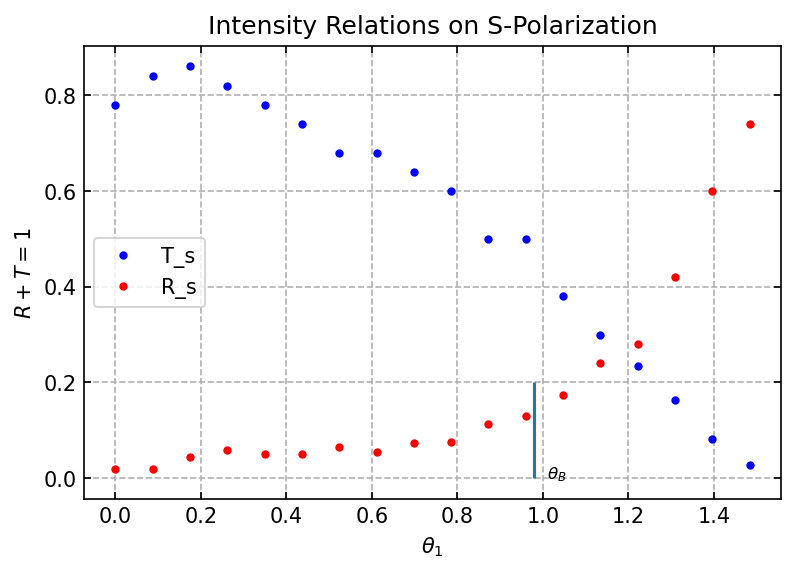

In [96]:
fig, ax = plt.subplots()

ax.plot(theta1_s, t_s, '.', color= 'blue',label = 'T_s')  # Plotting Transmitted Light
ax.plot(theta1_s, r_s, '.', color= 'red',label = 'R_s')  # Plotting Reflected Light
# ax.plot(theta1_s, total_s, '.', markersize = 4, color = 'black', label = 'total') #Plotting total light measured
ax.vlines(x = Brewster, ymin=0, ymax=0.20)
# ax.vlines(x = Critical, ymin=0, ymax=20)
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$ R + T = 1 $')
ax.grid(ls = '--')
ax.set_title(r'Intensity Relations on S-Polarization')
ax.legend()
ax.tick_params(direction = 'in', top = True, right = True)
ax.text(1.01, 0.0, s=r"$\theta_{B}$", fontsize=8)
plt.show()

Text(1.01, 0.0, '$\\theta_{B}$')

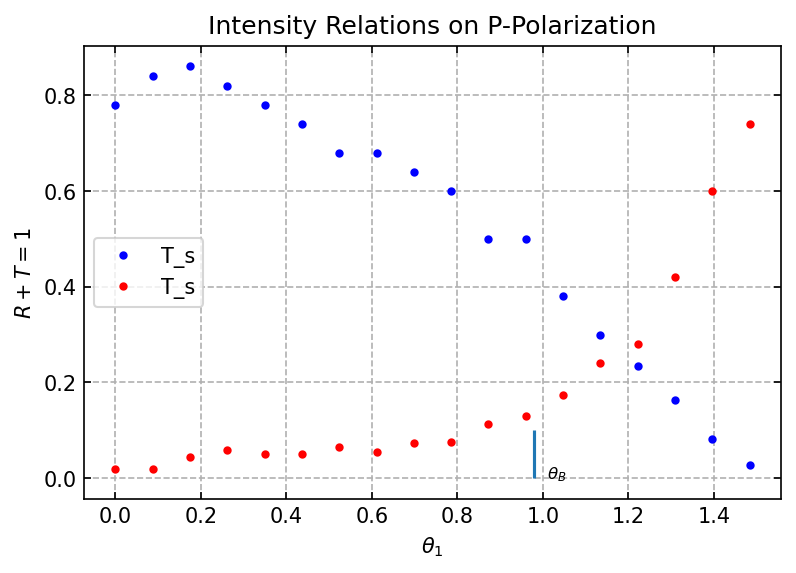

In [97]:
fig, ax = plt.subplots()

ax.plot(theta1_s, t_s, '.', color= 'blue',label = 'T_s')  # Plotting Transmitted Light
ax.plot(theta1_s, r_s, '.', color= 'red',label = 'T_s')  # Plotting Reflected Light
# ax.plot(theta1_p, total_p, '.',markersize =4, color = 'black', label = 'total')
ax.vlines(x = Brewster, ymin=0, ymax=0.1)
# ax.vlines(x = Critical, ymin=0, ymax=0.1)
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$ R + T = 1 $')
ax.grid(ls = '--')
ax.set_title(r'Intensity Relations on P-Polarization')
ax.legend()
ax.tick_params(direction = 'in', top = True, right = True)
ax.text(1.01, 0.0, s=r"$\theta_{B}$", fontsize=8)

INTENSITY PLOTS AIR TO GLASS

In [98]:
# Defining all the functions for the intensity
def reflected_p(angle1, angle2):
    return np.tan(angle1 - angle2)**2 / np.tan(angle1 + angle2)**2

def reflected_s(angle1, angle2):
    return np.sin(angle1 - angle2)**2 / np.sin(angle1 + angle2)**2

def transmitted_p(angle1, angle2):
    return np.sin(2 * angle1) * np.sin(2 * angle2) / (np.sin(angle1 + angle2)**2 * np.cos(angle1 - angle2))

def transmitted_s(angle1, angle2):
    return np.sin(2 * angle1) * np.sin(2 * angle2) / np.sin(angle1 + angle2)**2

/tmp/ipykernel_14712/3587821088.py:3: RuntimeWarning: invalid value encountered in divide
  return np.tan(angle1 - angle2)**2 / np.tan(angle1 + angle2)**2
/tmp/ipykernel_14712/3587821088.py:6: RuntimeWarning: invalid value encountered in divide
  return np.sin(angle1 - angle2)**2 / np.sin(angle1 + angle2)**2


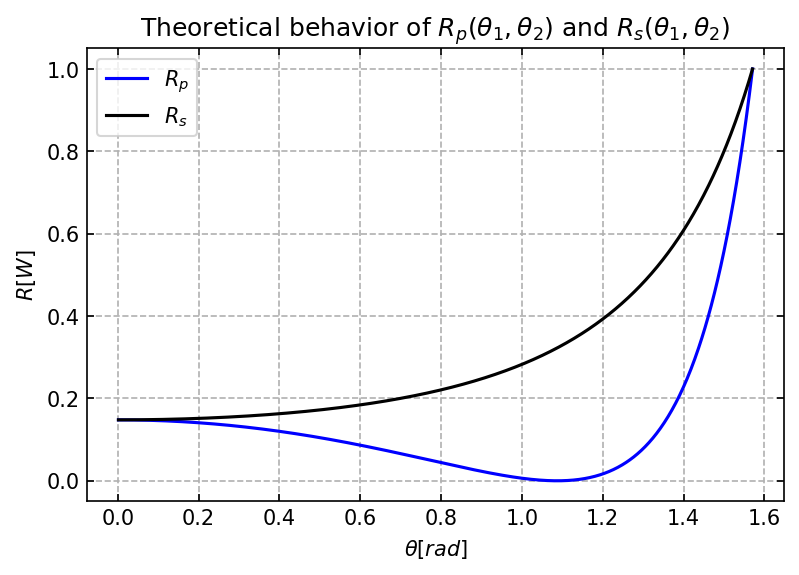

In [99]:
# Creating theoractical values for the angles
theoretical_theta1 = np.linspace(0, 90, 1000) * np.pi/180
theoretical_thetam = np.linspace(0, 50, 1000) * np.pi/180
theoretical_theta2 = theoretical_theta1 - theoretical_thetam

# Plotting reflection
plt.plot(theoretical_theta1, reflected_p(theoretical_theta1, theoretical_theta2), '-', color = 'blue', label = r'$R_p$')
plt.plot(theoretical_theta1, reflected_s(theoretical_theta1, theoretical_theta2), '-', color = 'black', label = r'$R_s$')
#plt.plot(theta1_s, reflected_s(theta1_s, theta2_reflect_s), '.', label = 'raw data')
#plt.plot(theta1_p, reflected_p(theta1_p, theta2_reflect_p), 'x', label = 'raw data')


#brewster = np.arctan(np.sqrt(p_opt_atg))
#plt.vlines(brewster, 0, 0.2)
   
# Adjust figure
plt.title(r'Theoretical behavior of $R_p(\theta_1, \theta_2)$ and $R_s(\theta_1, \theta_2)$')
plt.xlabel(r'$\theta [rad]$')
plt.ylabel(r'$R [W]$')
plt.grid(ls = '--')
plt.tick_params(direction = 'in', top = True, right = True)
plt.legend()

/tmp/ipykernel_14712/3587821088.py:9: RuntimeWarning: invalid value encountered in divide
  return np.sin(2 * angle1) * np.sin(2 * angle2) / (np.sin(angle1 + angle2)**2 * np.cos(angle1 - angle2))
/tmp/ipykernel_14712/3587821088.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sin(2 * angle1) * np.sin(2 * angle2) / np.sin(angle1 + angle2)**2


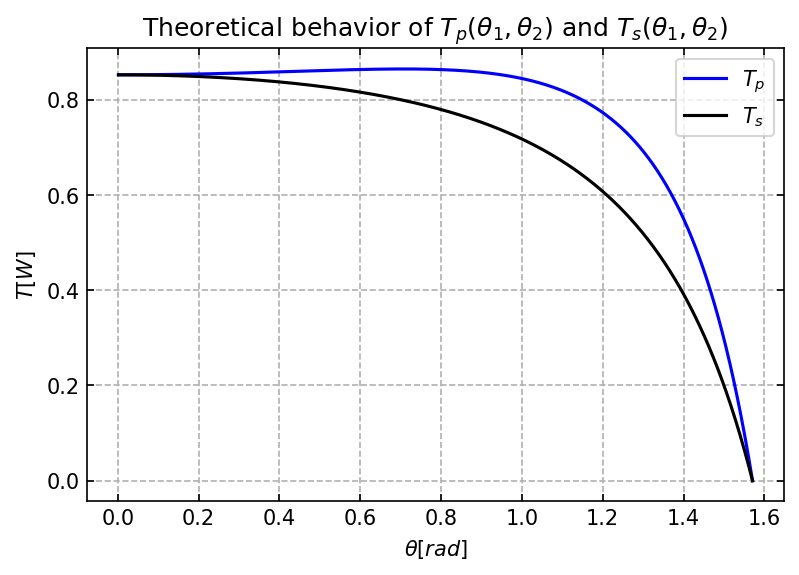

In [100]:
# Plotting transmission
plt.plot(theoretical_theta1, transmitted_p(theoretical_theta1, theoretical_theta2), '-', color = 'Blue', label = r'$T_p$')
plt.plot(theoretical_theta1, transmitted_s(theoretical_theta1, theoretical_theta2), '-', color = 'Black', label = r'$T_s$')
#plt.plot(theta1_s, transmitted_s(theta1_s, theta2_trans_s), '.', label = "$T_s$ data")
#plt.plot(theta1_p, transmitted_p(theta1_p, theta2_trans_p), '.', label = "$T_p$ data")
# brewster = np.arctan(np.sqrt(p_cov[0][0]))
# plt.vlines(brewster, 0, 0.2)
   
# Adjust figure
plt.title(r'Theoretical behavior of $T_p(\theta_1, \theta_2)$ and $T_s(\theta_1, \theta_2)$')
plt.xlabel(r'$\theta [rad]$')
plt.ylabel(r'$T [W]$')
plt.grid(ls = '--')
plt.tick_params(direction = 'in', top = True, right = True)
plt.legend()

## FINAL PLOTS

/tmp/ipykernel_14712/3587821088.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sin(2 * angle1) * np.sin(2 * angle2) / np.sin(angle1 + angle2)**2
/tmp/ipykernel_14712/3587821088.py:6: RuntimeWarning: invalid value encountered in divide
  return np.sin(angle1 - angle2)**2 / np.sin(angle1 + angle2)**2


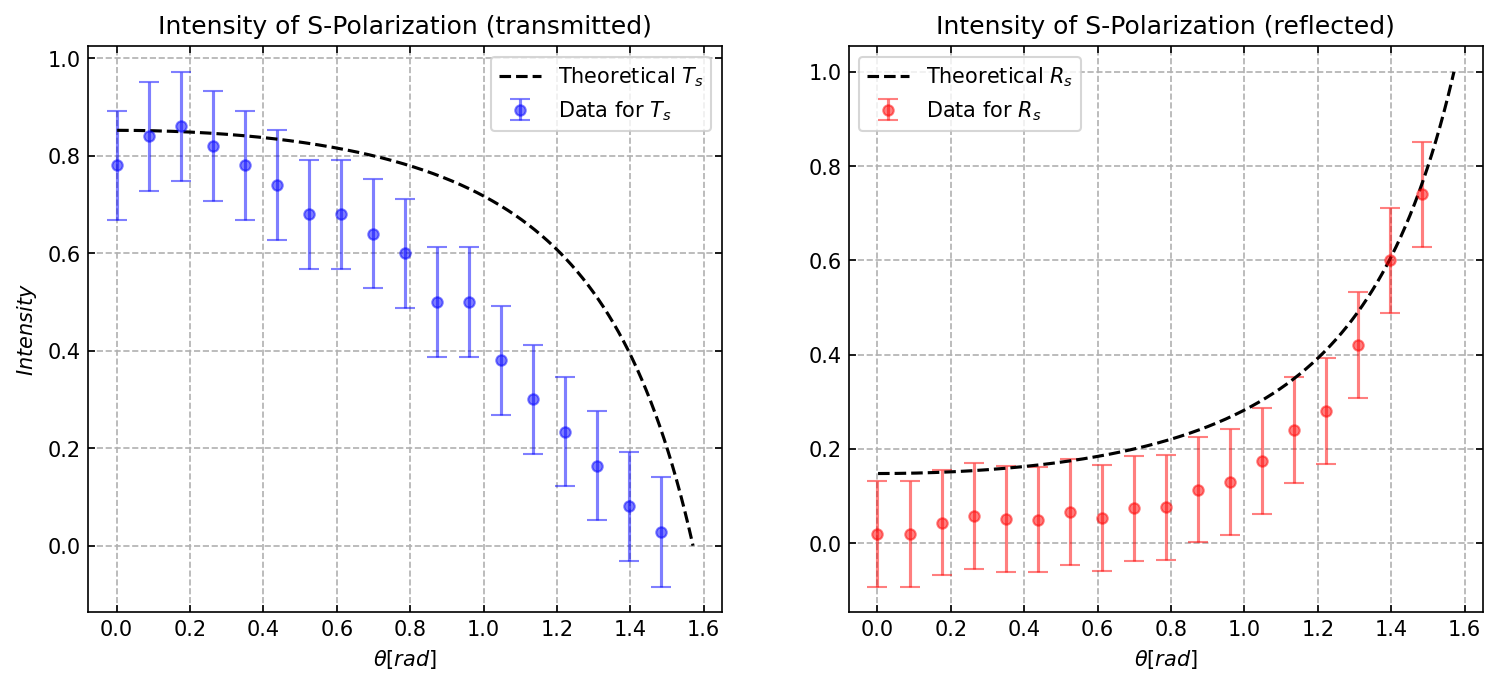

In [101]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# First axis object
ax1.errorbar(theta1_s, t_s, Volt_err, fmt = 'o', markersize = 5, capsize = 5, alpha = 0.5, color= 'blue',label = r'Data for $T_s$')  # Plotting Transmitted Light

# Plot theoretical
ax1.plot(theoretical_theta1, transmitted_s(theoretical_theta1, theoretical_theta2), '--', color = 'black', label = r'Theoretical $T_s$')

# ax.plot(theta1_p, total_p, '.',markersize =4, color = 'black', label = 'total')
#ax.vlines(x = Brewster, ymin=0, ymax=0.1)
# ax.vlines(x = Critical, ymin=0, ymax=0.1)
ax1.set_xlabel(r'$\theta [rad]$')
ax1.set_ylabel(r'$Intensity$')
ax1.set_title('Intensity of S-Polarization (transmitted)')
ax1.grid(ls = '--')
ax1.legend()
ax1.tick_params(direction = 'in', top = True, right = True)
# ax.text(1.01, 0.0, s = r"$\theta_{B}$", fontsize=8)

# second axis object
ax2.errorbar(theta1_s, r_s, Volt_err, fmt = 'o', markersize = 5, capsize = 5, alpha = 0.5, color= 'red',label = r'Data for $R_s$')  # Plotting Reflected Light
ax2.plot(theoretical_theta1, reflected_s(theoretical_theta1, theoretical_theta2), '--', color = 'black', label = r'Theoretical $R_s$')
ax2.set_xlabel(r'$\theta [rad]$')
ax2.set_title('Intensity of S-Polarization (reflected)')
ax2.tick_params(direction = 'in', top = True, right = True)
ax2.legend()
ax2.grid(ls = '--')

/tmp/ipykernel_14712/3587821088.py:9: RuntimeWarning: invalid value encountered in divide
  return np.sin(2 * angle1) * np.sin(2 * angle2) / (np.sin(angle1 + angle2)**2 * np.cos(angle1 - angle2))
/tmp/ipykernel_14712/3587821088.py:3: RuntimeWarning: invalid value encountered in divide
  return np.tan(angle1 - angle2)**2 / np.tan(angle1 + angle2)**2


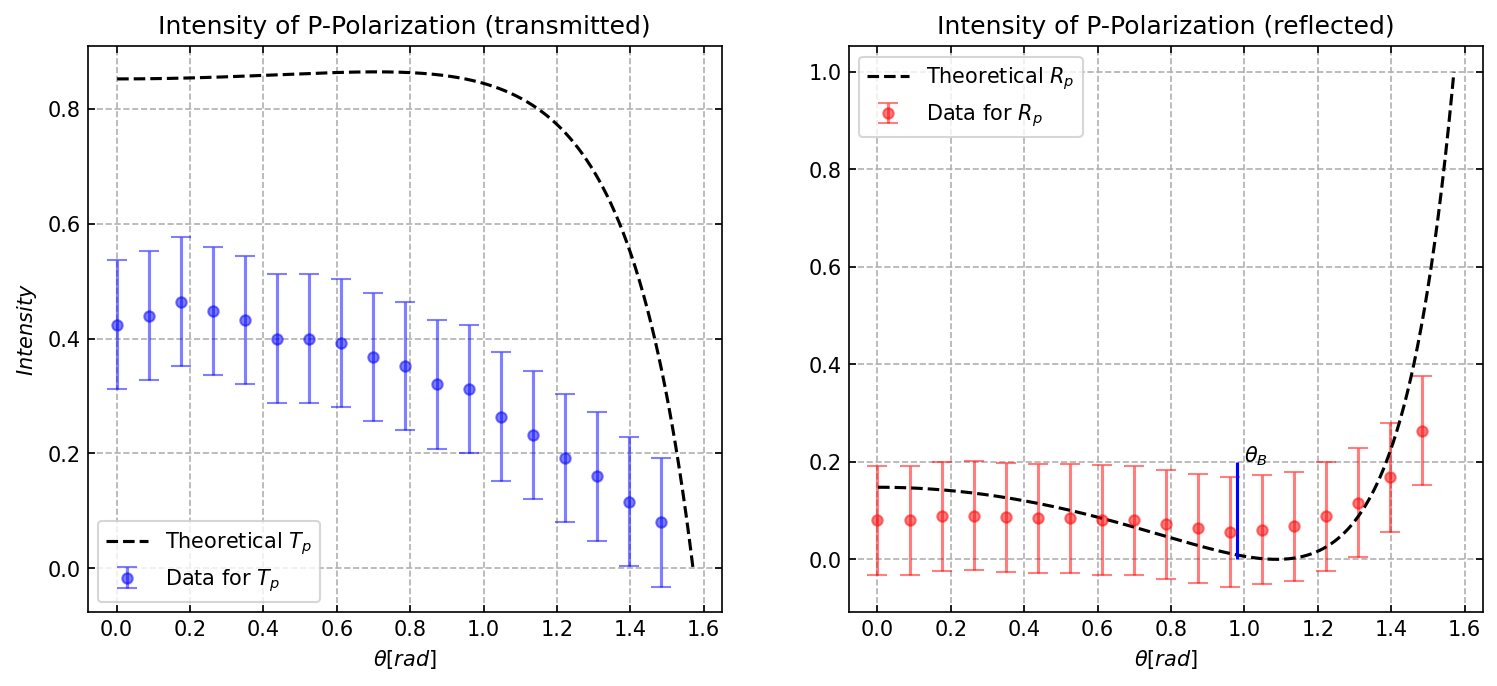

In [102]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# First axis object
ax1.errorbar(theta1_p, t_p, Volt_err, fmt = 'o', markersize = 5, capsize = 5, alpha = 0.5, color= 'blue',label = r'Data for $T_p$')  # Plotting Transmitted Light

# Plot theoretical
ax1.plot(theoretical_theta1, transmitted_p(theoretical_theta1, theoretical_theta2), linestyle = 'dashed', color = 'black', label = r'Theoretical $T_p$')

# ax.plot(theta1_p, total_p, '.',markersize =4, color = 'black', label = 'total')
# ax.vlines(x = Critical, ymin=0, ymax=0.1)
ax1.set_xlabel(r'$\theta [rad]$')
ax1.set_ylabel(r'$Intensity$')
ax1.set_title('Intensity of P-Polarization (transmitted)')
ax1.grid(ls = '--')
ax1.legend()
ax1.tick_params(direction = 'in', top = True, right = True)
# ax.text(1.01, 0.0, s = r"$\theta_{B}$", fontsize=8)

# second axis object
ax2.errorbar(theta1_p, r_p, Volt_err, fmt = 'o', markersize = 5, capsize = 5, alpha = 0.5, color= 'red',label = r'Data for $R_p$')  # Plotting Reflected Light
ax2.plot(theoretical_theta1, reflected_p(theoretical_theta1, theoretical_theta2), linestyle = 'dashed', color = 'black', label = r'Theoretical $R_p$')
ax2.vlines(x = Brewster, ymin=0, ymax=0.2, linestyle = '-', color = 'blue')
ax2.text(1.0, 0.2, r'$\theta_B$')
ax2.set_xlabel(r'$\theta [rad]$')
ax2.set_title('Intensity of P-Polarization (reflected)')
ax2.tick_params(direction = 'in', top = True, right = True)
ax2.legend()
ax2.grid(ls = '--')

In [103]:
#Weighted mean

w1 =1/0.001**2
w2 = 1/0.007**2
w3 = 1/0.013**2

w4 = 1/0.0028**2
w5 = 1/0.0061**2

x_atg=[1.4403,1.5269,1.4542]
x_gta =[0.9585,0.9785]

X_ATG = (w1*x_atg[0]+w2*x_atg[1]+w3*x_atg[2])/(w1+w2+w3)
X_GTA = (w4*x_gta[0]+w5*x_gta[1])/(w4+w5)

X_ATG, X_GTA

(1.4421021531944935, 0.9619805771365151)

In [104]:
#Standard error on the weighted mean is:
sigma_atg = np.sqrt((w1**2*0.001**2+w2**2*0.007**2+w3**2+0.013**2)/(w1**2+w2**2+w3**2))
sigma_atg

0.006001410332010635

In [105]:
sigma_gta =np.sqrt((w4**2*0.0028**2+w5**2*0.0061**2)/(w4**2+w5**2))
sigma_gta

0.003014696898610339